**Important URLs**


**Autoencoders**

https://keras.io/examples/vision/autoencoder/

**VAE**

https://keras.io/examples/generative/vae/

**GANs**

https://huggingface.co/learn/computer-vision-course/en/unit5/generative-models/gans

https://keras.io/examples/generative/conditional_gan/

**Transformers**

https://www.geeksforgeeks.org/nlp/types-of-attention-mechanism/


https://www.geeksforgeeks.org/machine-learning/getting-started-with-transformers/


**Huggingface Capabilities on Text**

https://huggingface.co/learn/llm-course/en/chapter1/3


**BERT**

https://www.geeksforgeeks.org/nlp/explanation-of-bert-model-nlp/


https://huggingface.co/docs/transformers/en/model_doc/bert


### Convolutional autoencoder for image denoising

## Introduction

This example demonstrates how to implement a deep convolutional autoencoder
for image denoising, mapping noisy digits images from the MNIST dataset to
clean digits images. This implementation is based on an original blog post
titled [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
by [François Chollet](https://twitter.com/fchollet).

## Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras.datasets import mnist
from keras.models import Model


def preprocess(array):
    """Normalizes the supplied array and reshapes it."""
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """Adds random noise to each image in the supplied array."""
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """Displays ten random images from each array."""
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

## Prepare the data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


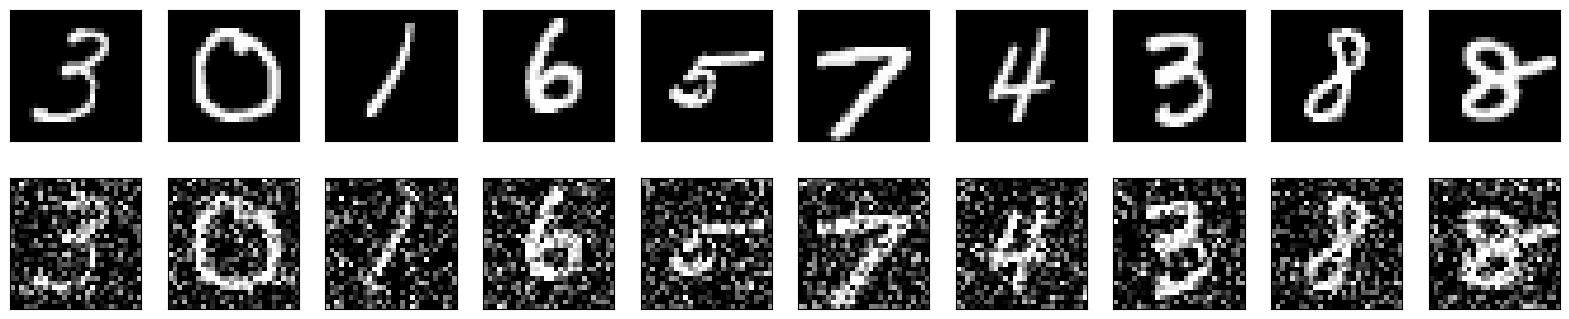

In [ ]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

## Build the autoencoder

We are going to use the Functional API to build our convolutional autoencoder.

In [ ]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

Now we can train our autoencoder using `train_data` as both our input data
and target. Notice we are setting up the validation data using the same
format.

In [ ]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.2484 - val_loss: 0.0730
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0723 - val_loss: 0.0695
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0697 - val_loss: 0.0681
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0685 - val_loss: 0.0672
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0674 - val_loss: 0.0665
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0667 - val_loss: 0.0660
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0663 - val_loss: 0.0655
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0660 - val_loss: 0.0653
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0656 - val_loss: 0.0649
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0653 - val_loss: 0.0647
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0651 - val_loss: 0.0645
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/st

Let's predict on our test dataset and display the original image together with
the prediction from our autoencoder.

Notice how the predictions are pretty close to the original images, although
not quite the same.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


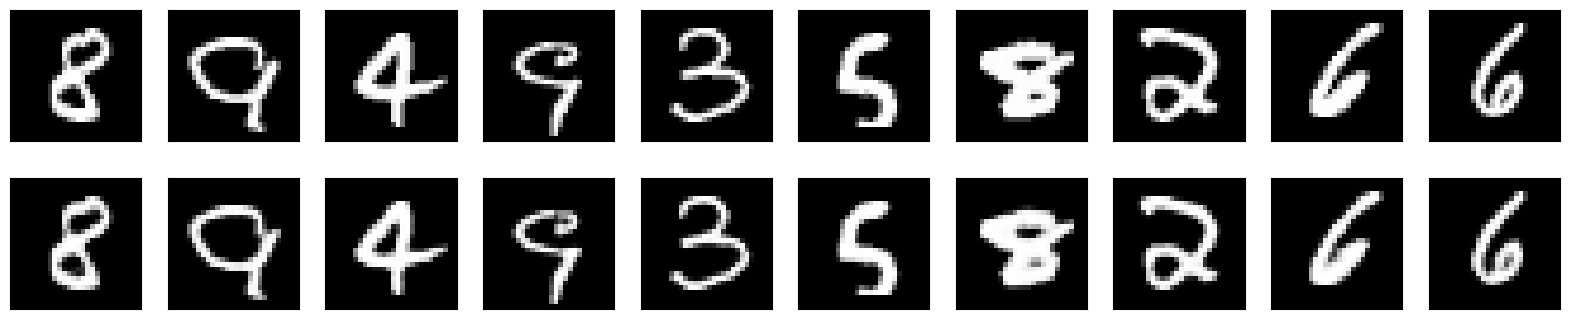

In [ ]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

Now that we know that our autoencoder works, let's retrain it using the noisy
data as our input and the clean data as our target. We want our autoencoder to
learn how to denoise the images.

In [ ]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1176 - val_loss: 0.0948
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0945 - val_loss: 0.0924
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0928 - val_loss: 0.0911
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0914 - val_loss: 0.0900
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0904 - val_loss: 0.0892
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0897 - val_loss: 0.0887
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0894 - val_loss: 0.0883
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0888 - val_loss: 0.0878
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0884 - val_loss: 0.0875
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0880 - val_loss: 0.0872
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0878 - val_loss: 0.0871
Epoch 12/100
469/469 ━━━━━━━━━━━━━━━━━━━━

Let's now predict on the noisy data and display the results of our autoencoder.

Notice how the autoencoder does an amazing job at removing the noise from the
input images.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


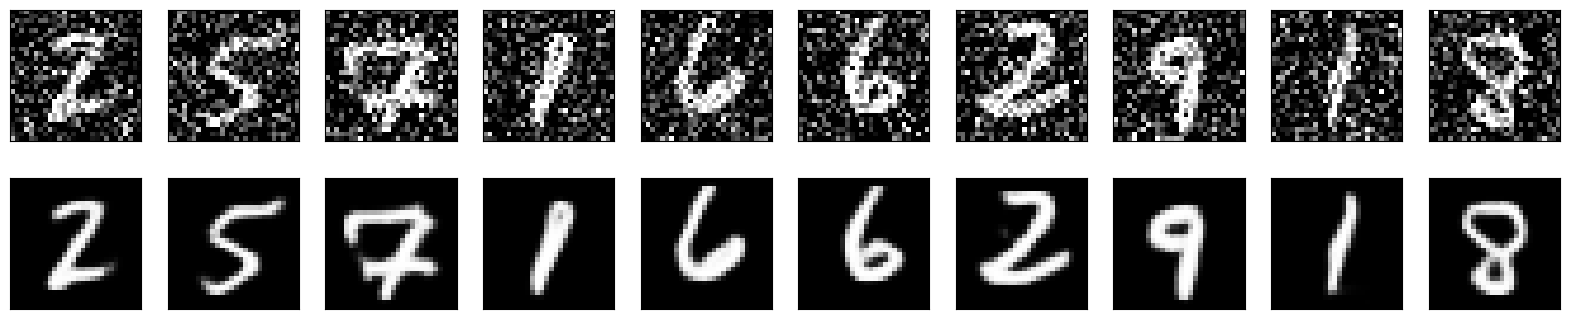

In [ ]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)

###Transformers

In [ ]:
!pip install transformers
from transformers import pipeline

# 1. Load a pre-trained sentiment analysis pipeline
# This pipeline uses a Transformer model fine-tuned for sentiment analysis.
classifier = pipeline("sentiment-analysis")

# 2. Provide text input
text1 = "I love using the Hugging Face Transformers library!"
text2 = "This movie was incredibly boring and a waste of time."

# 3. Perform sentiment analysis
result1 = classifier(text1)
result2 = classifier(text2)

# 4. Print the results
print(f"Text 1: '{text1}'")
print(f"Sentiment: {result1[0]['label']}, Score: {result1[0]['score']:.4f}\n")

print(f"Text 2: '{text2}'")
print(f"Sentiment: {result2[0]['label']}, Score: {result2[0]['score']:.4f}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f.
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Text 1: 'I love using the Hugging Face Transformers library!'
Sentiment: POSITIVE, Score: 0.9983

Text 2: 'This movie was incredibly boring and a waste of time.'
Sentiment: NEGATIVE, Score: 0.9998


### BERT

In [ ]:
import torch
from transformers import pipeline

pipeline = pipeline(
    task="fill-mask",
    model="google-bert/bert-base-uncased",
    dtype=torch.float16,
    device=0
)
pipeline("Plants create [MASK] through a process known as photosynthesis.")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/202 [00:00<?, ?it/s]

BertForMaskedLM LOAD REPORT from: google-bert/bert-base-uncased
Key                         | Status     |  | 
----------------------------+------------+--+-
cls.seq_relationship.weight | UNEXPECTED |  | 
bert.pooler.dense.weight    | UNEXPECTED |  | 
bert.pooler.dense.bias      | UNEXPECTED |  | 
cls.seq_relationship.bias   | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

[{'score': 0.151123046875,
  'token': 2943,
  'token_str': 'energy',
  'sequence': 'plants create energy through a process known as photosynthesis.'},
 {'score': 0.1453857421875,
  'token': 4870,
  'token_str': 'flowers',
  'sequence': 'plants create flowers through a process known as photosynthesis.'},
 {'score': 0.0821533203125,
  'token': 9325,
  'token_str': 'sunlight',
  'sequence': 'plants create sunlight through a process known as photosynthesis.'},
 {'score': 0.04296875,
  'token': 18670,
  'token_str': 'algae',
  'sequence': 'plants create algae through a process known as photosynthesis.'},
 {'score': 0.037628173828125,
  'token': 12649,
  'token_str': 'atp',
  'sequence': 'plants create atp through a process known as photosynthesis.'}]

### Stable Diffusion

In [ ]:
!pip install tensorflow keras_cv --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 33.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.


By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
1356917/1356917 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
492466864/492466864 ━━━━━━━━━━━━━━━━━━━━ 44s 0us/step
3439090152/3439090152 ━━━━━━━━━━━━━━━━━━━━ 97s 0us/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step
198180272/198180272 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


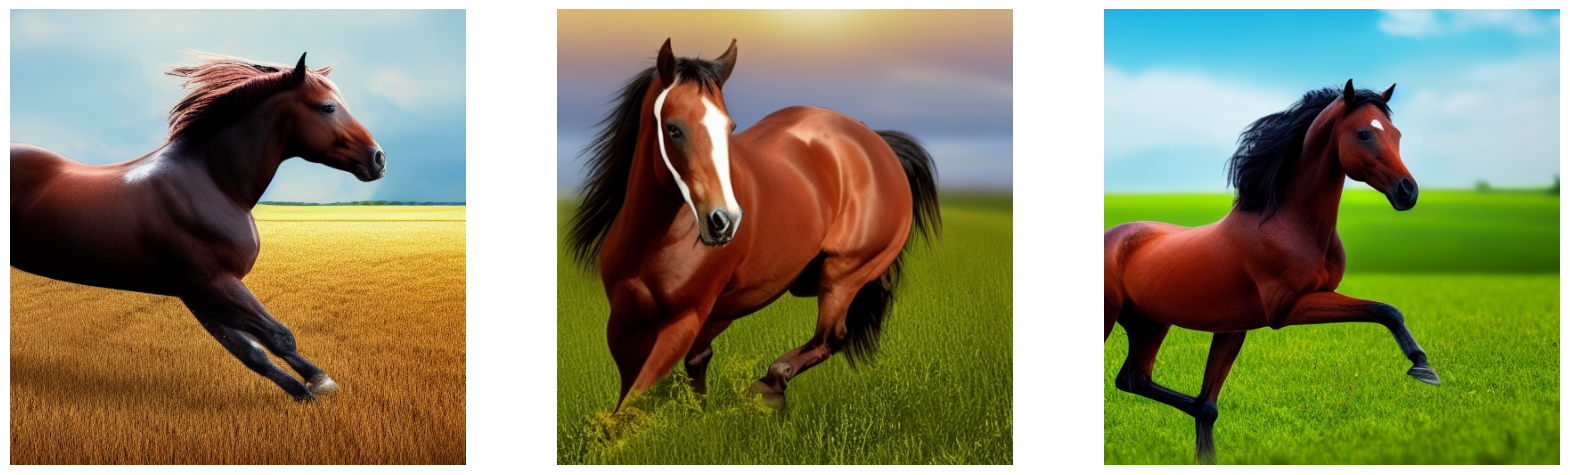

In [ ]:
import keras_cv
import matplotlib.pyplot as plt
import numpy as np

# Instantiate the Stable Diffusion model
# This will automatically download the pre-trained weights
model = keras_cv.models.StableDiffusion(jit_compile=True)

# Define your text prompt
prompt = "A beautiful horse running through a field, highly detailed, 8k"

# Generate images
images = model.text_to_image(prompt, batch_size=3, num_steps=25)

# Plot the generated images (optional, for visualization)
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.axis("off")
    plt.show()

plot_images(images)
